#**IMPORTING LIBRARY**




In [ ]:
import math 
from collections import Counter, defaultdict 
from functools import partial

import graphviz 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
plt.style.use("fivethirtyeight")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**IMPORTING FILE**

In [ ]:
dfprodm=pd.read_csv('/content/drive/MyDrive/FINAL PROJECT RG 210/dept_product/inv_distribution_center_men.csv')
dfprodw=pd.read_csv('/content/drive/MyDrive/FINAL PROJECT RG 210/dept_product/inv_distribution_center_women.csv')

In [ ]:
dfprodm

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,dist_center_id,name,latitude,longitude
0,90967,16898,2021-07-19 02:20:10,2021-07-20 14:34:10,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3,3,Houston TX,29.7604,-95.3698
1,90968,16898,2020-04-13 07:46:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3,3,Houston TX,29.7604,-95.3698
2,90969,16898,2020-09-02 17:43:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3,3,Houston TX,29.7604,-95.3698
3,90970,16898,2021-08-19 15:17:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3,3,Houston TX,29.7604,-95.3698
4,96715,16898,2020-05-09 11:16:10,2020-06-23 23:59:10,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3,3,Houston TX,29.7604,-95.3698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244416,458707,18150,2020-03-15 16:19:00,NaN,14.751,Active,3 PAIR -30 BELOW THERMAL WINTER SOCKS (MERINO ...,J.B. Icelandic (Extreme Cold Activity),33.0,Men,CD4B78A5026AAFF9159F31E5C5997089,3,3,Houston TX,29.7604,-95.3698
244417,458708,18150,2021-12-29 08:07:00,NaN,14.751,Active,3 PAIR -30 BELOW THERMAL WINTER SOCKS (MERINO ...,J.B. Icelandic (Extreme Cold Activity),33.0,Men,CD4B78A5026AAFF9159F31E5C5997089,3,3,Houston TX,29.7604,-95.3698
244418,485671,18150,2022-02-24 10:14:40,2022-02-27 22:45:40,14.751,Active,3 PAIR -30 BELOW THERMAL WINTER SOCKS (MERINO ...,J.B. Icelandic (Extreme Cold Activity),33.0,Men,CD4B78A5026AAFF9159F31E5C5997089,3,3,Houston TX,29.7604,-95.3698
244419,485672,18150,2020-07-23 07:12:00,NaN,14.751,Active,3 PAIR -30 BELOW THERMAL WINTER SOCKS (MERINO ...,J.B. Icelandic (Extreme Cold Activity),33.0,Men,CD4B78A5026AAFF9159F31E5C5997089,3,3,Houston TX,29.7604,-95.3698


drop kolom yang tidak mengandung informasi khusus untuk modelling

In [ ]:
del dfprodm['id']
del dfprodm['product_id']
del dfprodm['sold_at']
del dfprodm['created_at']
del dfprodm['product_brand']
del dfprodm['product_name']
del dfprodm['product_distribution_center_id']
del dfprodm['product_sku']
del dfprodm['dist_center_id']
del dfprodm['latitude']
del dfprodm['longitude']

In [ ]:
dfprodw

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,dist_center_id,name,latitude,longitude
0,179253,9482,2022-02-02 04:03:26,2022-02-07 03:30:26,5.712000,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.000000,Women,C5A3C867A3DFB776552DCFC804D4937E,3,3,Houston TX,29.7604,-95.3698
1,179254,9482,2020-08-27 07:42:00,NaN,5.712000,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.000000,Women,C5A3C867A3DFB776552DCFC804D4937E,3,3,Houston TX,29.7604,-95.3698
2,242620,9482,2022-03-18 17:50:30,2022-05-03 12:35:30,5.712000,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.000000,Women,C5A3C867A3DFB776552DCFC804D4937E,3,3,Houston TX,29.7604,-95.3698
3,242621,9482,2020-08-01 14:35:00,NaN,5.712000,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.000000,Women,C5A3C867A3DFB776552DCFC804D4937E,3,3,Houston TX,29.7604,-95.3698
4,242622,9482,2021-10-12 03:52:00,NaN,5.712000,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.000000,Women,C5A3C867A3DFB776552DCFC804D4937E,3,3,Houston TX,29.7604,-95.3698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242968,234443,14392,2020-04-09 17:38:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9,9,Charleston SC,32.7833,-79.9333
242969,290890,14392,2021-03-18 14:42:49,2021-05-15 04:49:49,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9,9,Charleston SC,32.7833,-79.9333
242970,290891,14392,2022-04-25 03:04:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9,9,Charleston SC,32.7833,-79.9333
242971,301361,14392,2021-05-15 11:44:11,2021-06-27 04:00:11,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9,9,Charleston SC,32.7833,-79.9333


drop kolom yang tidak mengandung informasi khusus untuk modelling

In [ ]:
del dfprodw['id']
del dfprodw['product_id']
del dfprodw['sold_at']
del dfprodw['created_at']
del dfprodw['product_brand']
del dfprodw['product_name']
del dfprodw['product_distribution_center_id']
del dfprodw['product_sku']
del dfprodw['dist_center_id']
del dfprodw['latitude']
del dfprodw['longitude']

#**DATA INFO**

In [ ]:
dfprodm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244421 entries, 0 to 244420
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cost                  244421 non-null  float64
 1   product_category      244421 non-null  object 
 2   product_retail_price  244421 non-null  float64
 3   product_department    244421 non-null  object 
 4   name                  244421 non-null  object 
dtypes: float64(2), object(3)
memory usage: 9.3+ MB


Total data: 244420 baris

In [ ]:
dfprodw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242973 entries, 0 to 242972
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cost                  242973 non-null  float64
 1   product_category      242973 non-null  object 
 2   product_retail_price  242973 non-null  float64
 3   product_department    242973 non-null  object 
 4   name                  242973 non-null  object 
dtypes: float64(2), object(3)
memory usage: 9.3+ MB


Total data: 242972 baris

#**HANDLING MISSING VALUE**

##**MEN**

In [ ]:
dfprodm.isna().sum()

cost                    0
product_category        0
product_retail_price    0
product_department      0
name                    0
dtype: int64

Tidak terdapat missing value pada tabel dfprodm

##**WOMEN**

In [ ]:
dfprodw.isna().sum()

cost                    0
product_category        0
product_retail_price    0
product_department      0
name                    0
dtype: int64

Tidak terdapat missing value pada tabel dfprodw

#**HANDLING OUTLIER**

##**MEN**

Pemisahan data numerical (int dan float) dan categorical (object)

In [ ]:
num_m=dfprodm.select_dtypes(include='number').columns.tolist()
cat_m=dfprodm.select_dtypes(include='object').columns.tolist()
print(num_m)
print(cat_m)

['cost', 'product_retail_price']
['product_category', 'product_department', 'name']


Box Plot guna melihat outlier pada data numerical

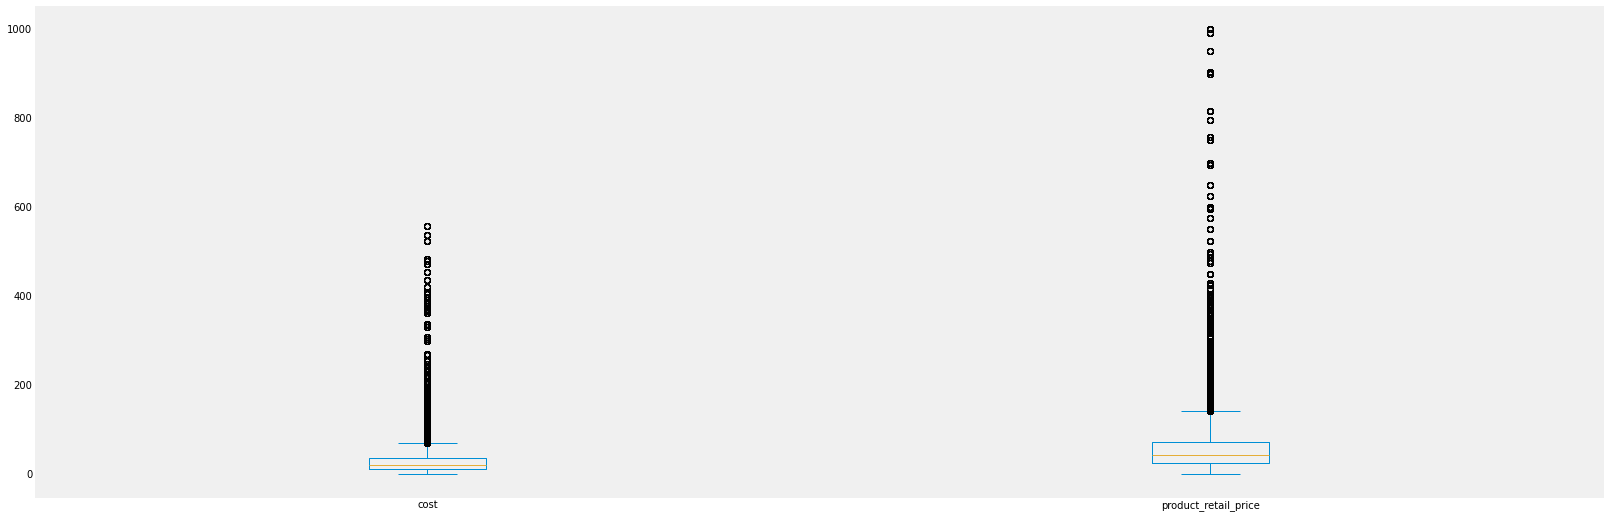

In [ ]:
dfprodm[num_m].plot(kind='box',figsize=(25,9))
plt.grid(False)
plt.show()

Terdapat outlier pada kolom cost dan product_retail_price

Statistik Deskriptif data numerical sebelum handling outlier

In [ ]:
dfprodm[num_m].describe().T

,count,mean,std,min,25%,50%,75%,max
cost,244421.0,30.615779,32.327968,0.606,12.53582,21.886879,36.070500,557.151002
product_retail_price,244421.0,63.559768,69.703563,1.500,25.00000,44.500000,71.800003,999.000000


Handling outlier menggunakan metode IQR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


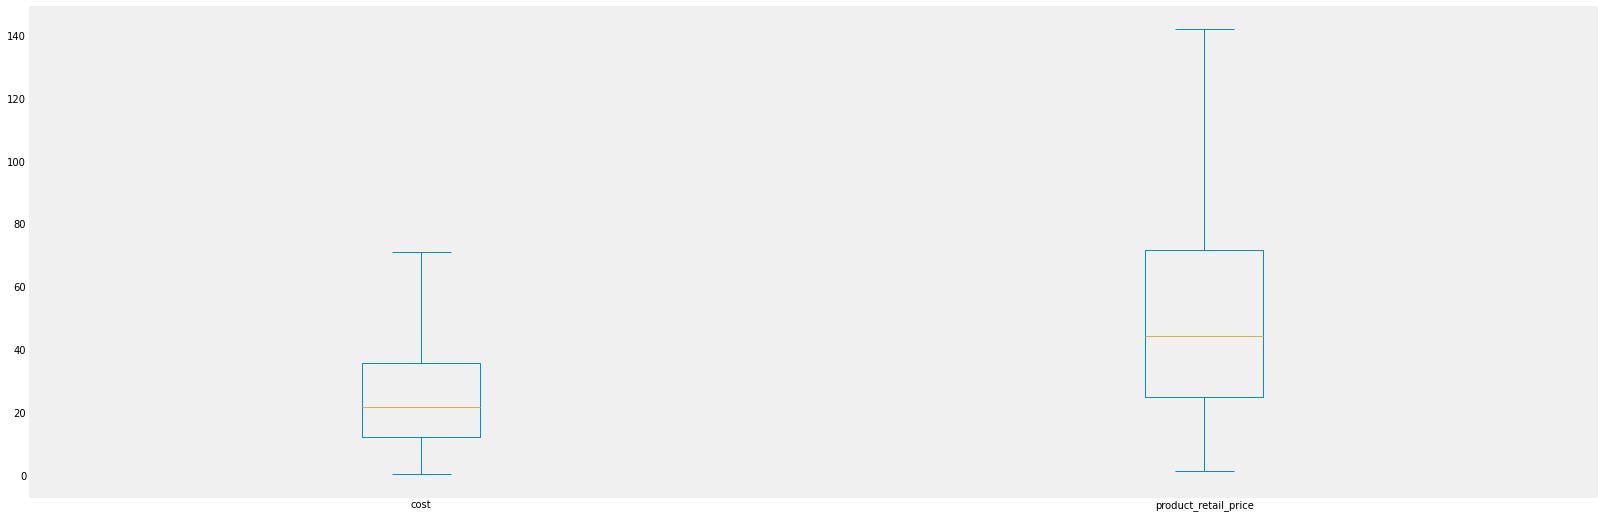

In [ ]:
q1=dfprodm[['cost','product_retail_price']].quantile(0.25)
q3=dfprodm[['cost','product_retail_price']].quantile(0.75)
IQR=q3-q1
max=q3+1.5*IQR
min=q1-1.5*IQR
dfprodm=dfprodm.mask(dfprodm>max,max,axis=1)
dfprodm=dfprodm.mask(dfprodm<min,min,axis=1)
dfprodm[num_m].plot(kind='box',figsize=(25,9))
plt.grid(False)
plt.show()

Sudah tidak terdapat outlier pada data

Statistik Deskriptif data numerical setelah handling outlier

In [ ]:
dfprodm[num_m].describe().T

,count,mean,std,min,25%,50%,75%,max
cost,244421.0,27.395622,19.278637,0.606,12.53582,21.886879,36.070500,71.372520
product_retail_price,244421.0,55.737394,39.144100,1.500,25.00000,44.500000,71.800003,142.000008


Statistik Deskriptif data categorical

In [ ]:
dfprodm[cat_m].describe().T

,count,unique,top,freq
product_category,244421,14,Jeans,20916
product_department,244421,1,Men,244421
name,244421,10,Memphis TN,32475


##**WOMEN**

Pemisahan data numerical dan categorical

In [ ]:
num_w=dfprodw.select_dtypes(include='number').columns.tolist()
cat_w=dfprodw.select_dtypes(include='object').columns.tolist()
print(num_w)
print(cat_w)

['cost', 'product_retail_price']
['product_category', 'product_department', 'name']


Pembuatan boxplot guna melihat outlier

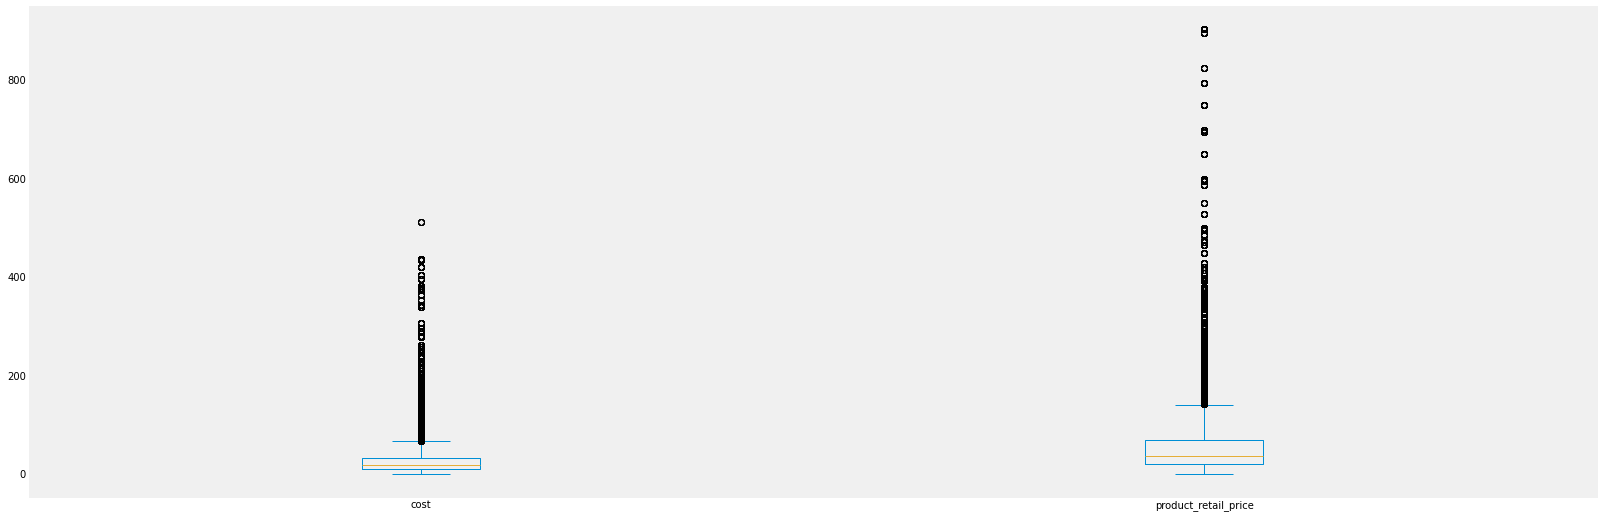

In [ ]:
dfprodw[num_w].plot(kind='box',figsize=(25,9))
plt.grid(False)
plt.show()

Terdapat outlier pada cost dan product_retail_price

Statistik deskriptif sebelum handling outlier

In [ ]:
dfprodw[num_w].describe().T

,count,mean,std,min,25%,50%,75%,max
cost,242973.0,26.865828,28.697105,0.0083,10.13727,18.299451,33.075,512.001
product_retail_price,242973.0,55.963333,61.543285,0.0200,20.99000,37.599998,69.000,903.000


Handling outlier dengan metode IQR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


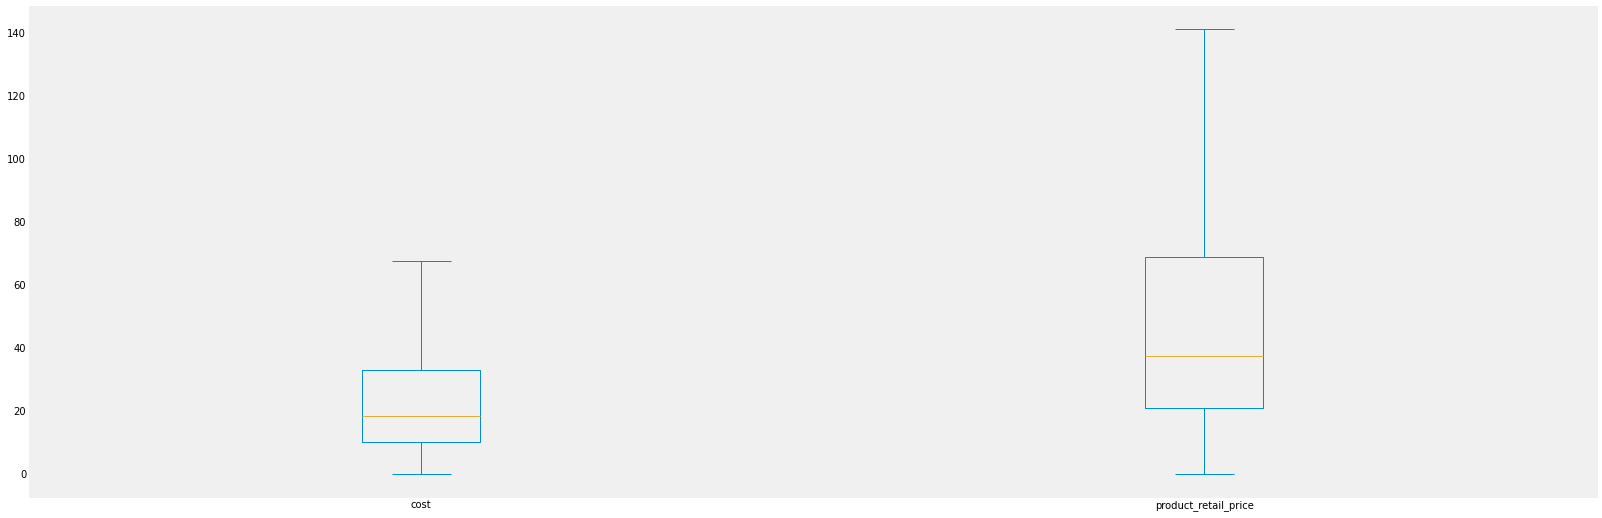

In [ ]:
q1=dfprodw[['cost','product_retail_price']].quantile(0.25)
q3=dfprodw[['cost','product_retail_price']].quantile(0.75)
IQR=q3-q1
max=q3+1.5*IQR
min=q1-1.5*IQR
dfprodw=dfprodw.mask(dfprodw>max,max,axis=1)
dfprodw=dfprodw.mask(dfprodw<min,min,axis=1)
dfprodw[num_w].plot(kind='box',figsize=(25,9))
plt.grid(False)
plt.show()

Statistik deskriptif setelah handling outlier

In [ ]:
dfprodw[num_w].describe().T

,count,mean,std,min,25%,50%,75%,max
cost,242973.0,24.280999,18.716433,0.0083,10.13727,18.299451,33.075,67.481596
product_retail_price,242973.0,50.430202,39.206171,0.0200,20.99000,37.599998,69.000,141.015000


Statistik deskriptif data kategorikal

In [ ]:
dfprodw[cat_w].describe().T

,count,unique,top,freq
product_category,242973,22,Intimates,36319
product_department,242973,1,Women,242973
name,242973,10,Chicago IL,38201


#**EXPLORATORY DATA ANALYSIS**

##**MEN**

Heatmap untuk mengetahui korelasi antar kolom data numerical

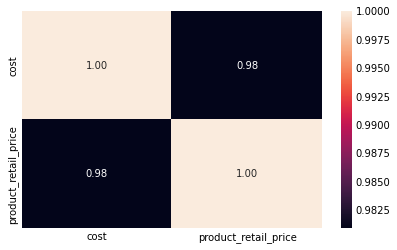

In [ ]:
sns.heatmap(dfprodm.corr(),annot=True,fmt='.2f')
plt.show()

Terdapat korelasi tinggi antara cost dan product_retail_price (0.98)

Jumlah tiap product category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


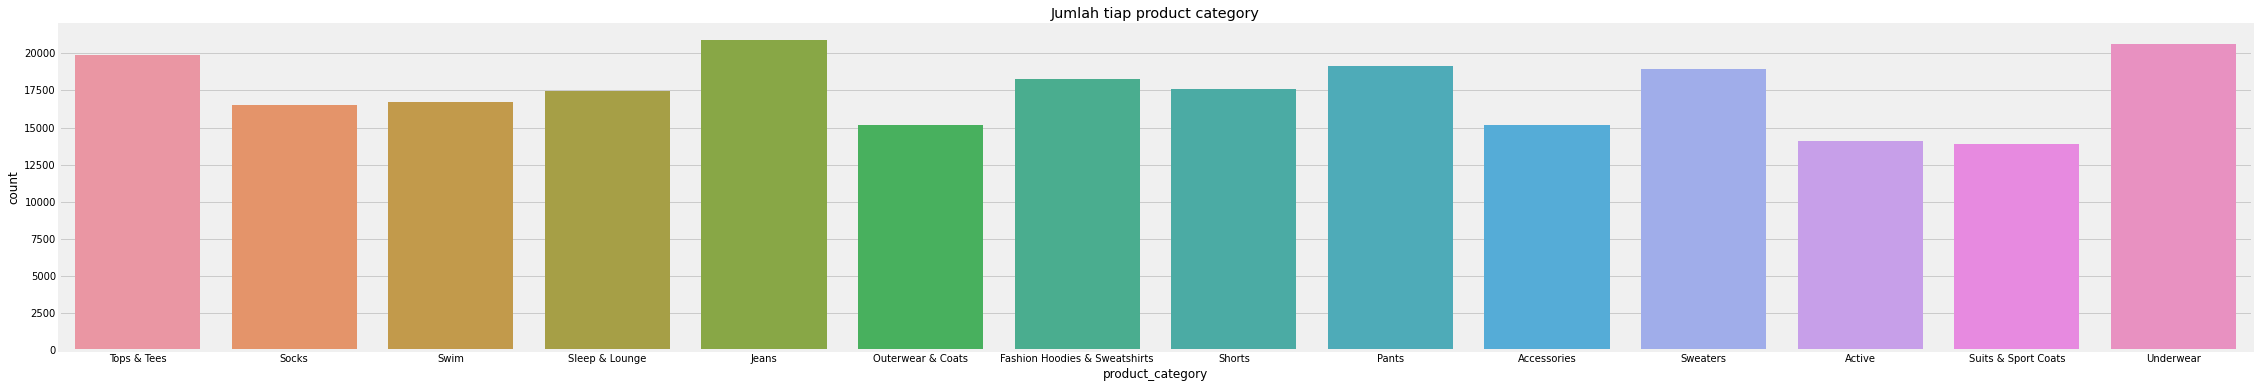

In [ ]:
plt.figure(figsize=(35,6))
sns.countplot('product_category',data=dfprodm)
plt.title('Jumlah tiap product category')
plt.show()

Jumlah terbanyak pada kategori jeans

Jumlah tiap produk pada tiap product distribution center

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


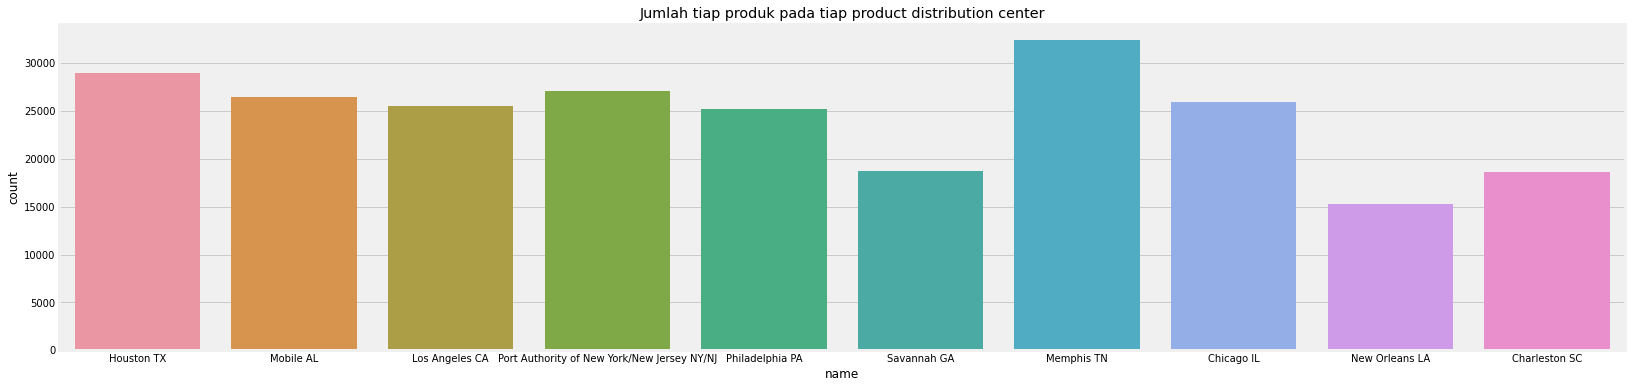

In [ ]:
plt.figure(figsize=(25,6))
sns.countplot('name',data=dfprodm)
plt.title('Jumlah tiap produk pada tiap product distribution center')
plt.show()

Produk terbanyak didistribusikan dari Memphis TN

Jumlah tiap produk pada tiap distribution center tiap product category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


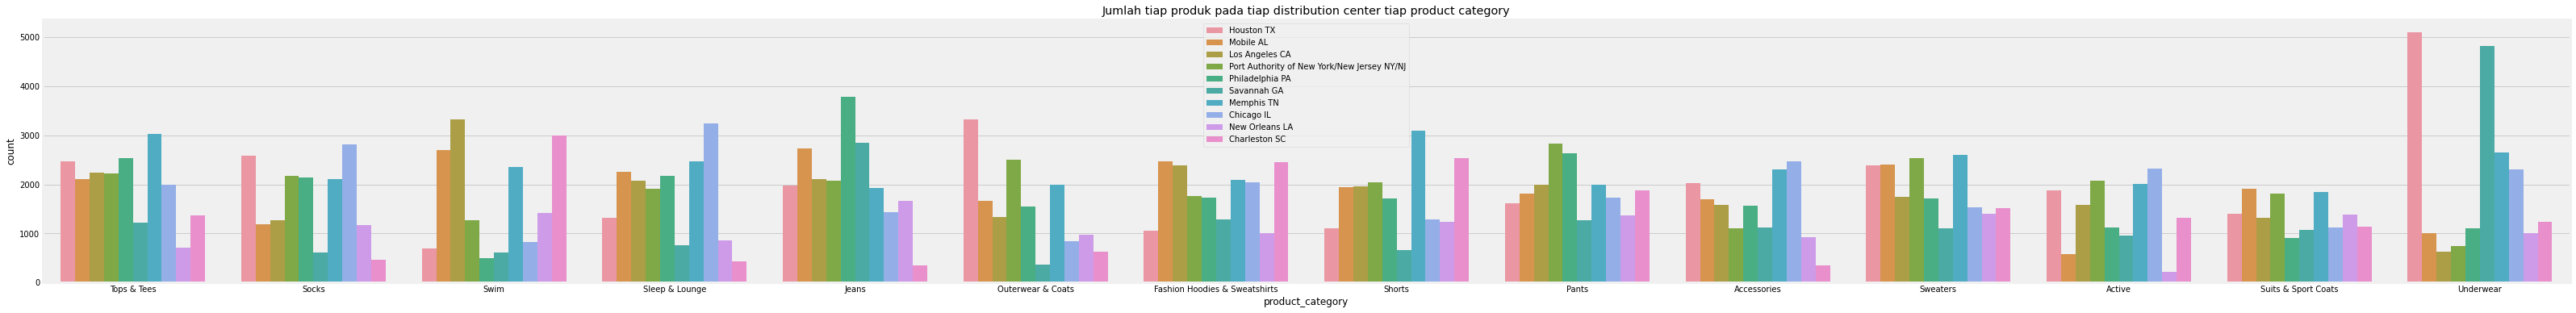

In [ ]:
plt.figure(figsize=(50,6))
sns.countplot('product_category',data=dfprodm,hue='name')
plt.title('Jumlah tiap produk pada tiap distribution center tiap product category')
plt.legend(loc='best')
plt.show()

##**WOMEN**

Heatmap untuk melihat korelasi antar kolom numerical

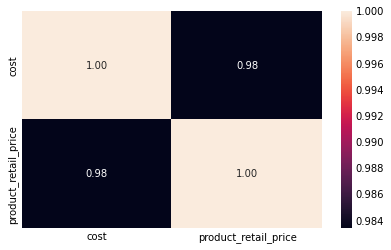

In [ ]:
sns.heatmap(dfprodw.corr(),annot=True,fmt='.2f')
plt.show()

Terdapat korelasi tinggi antara cost dan product_retail_price

Jumlah tiap product category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


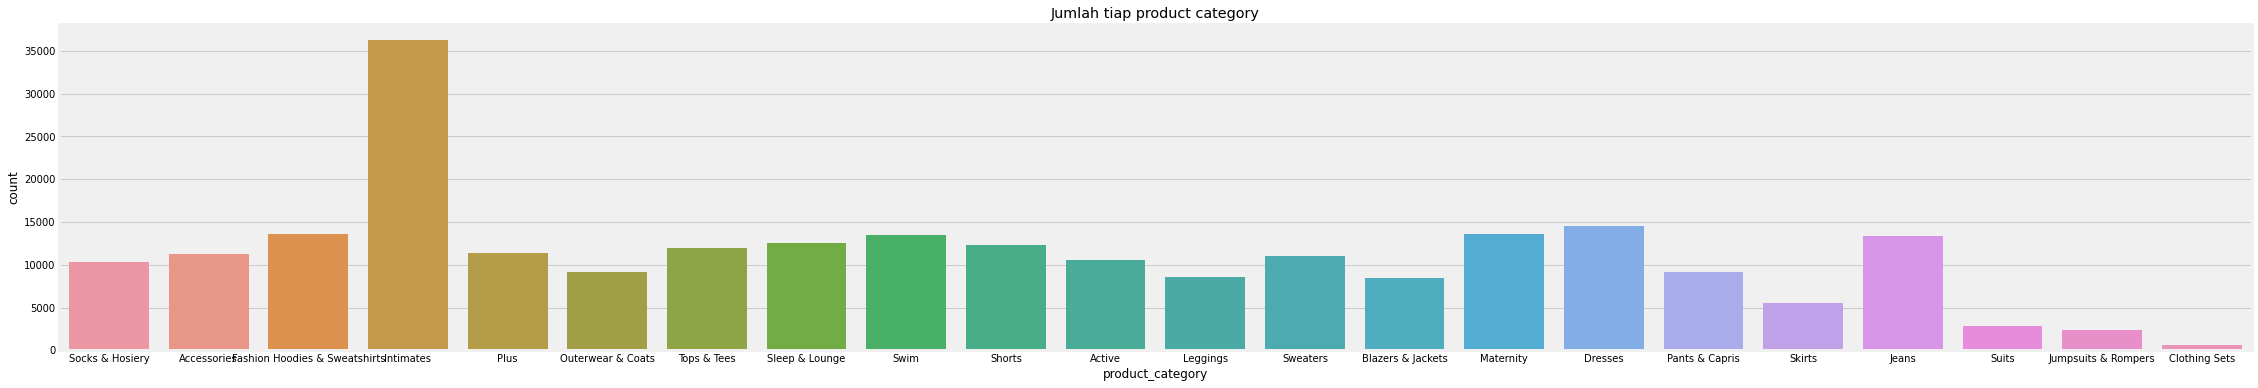

In [ ]:
plt.figure(figsize=(35,6))
sns.countplot('product_category',data=dfprodw)
plt.title('Jumlah tiap product category')
plt.show()

Product category terbanyak adalah intimates

Jumlah tiap produk pada tiap product distribution center

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


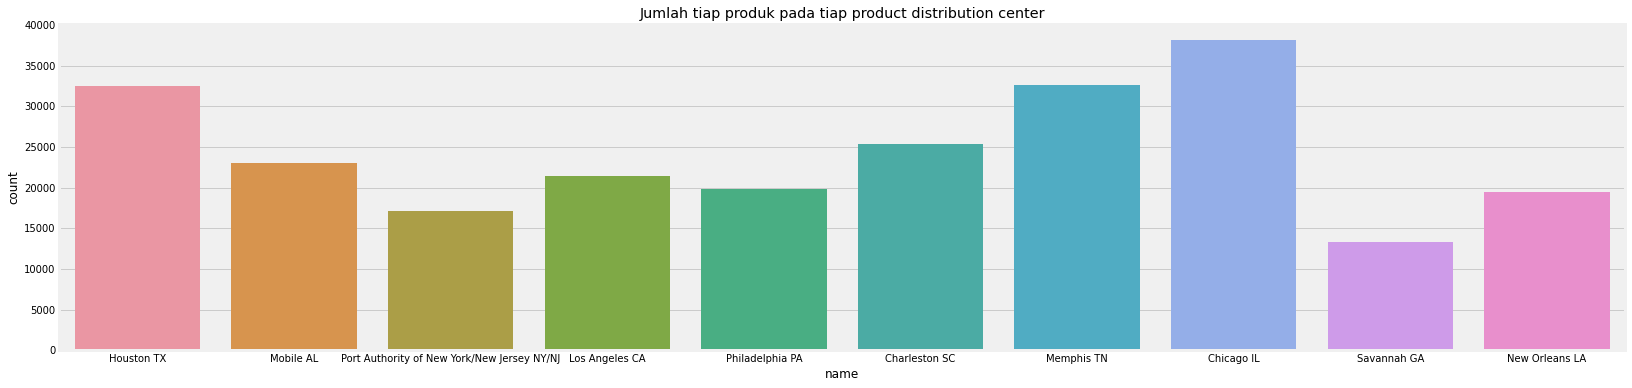

In [ ]:
plt.figure(figsize=(25,6))
sns.countplot('name',data=dfprodw)
plt.title('Jumlah tiap produk pada tiap product distribution center')
plt.show()

Jumlah tiap produk tertinggi didistribusikan dari Chicago IL

Jumlah tiap produk pada tiap distribution center tiap product category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


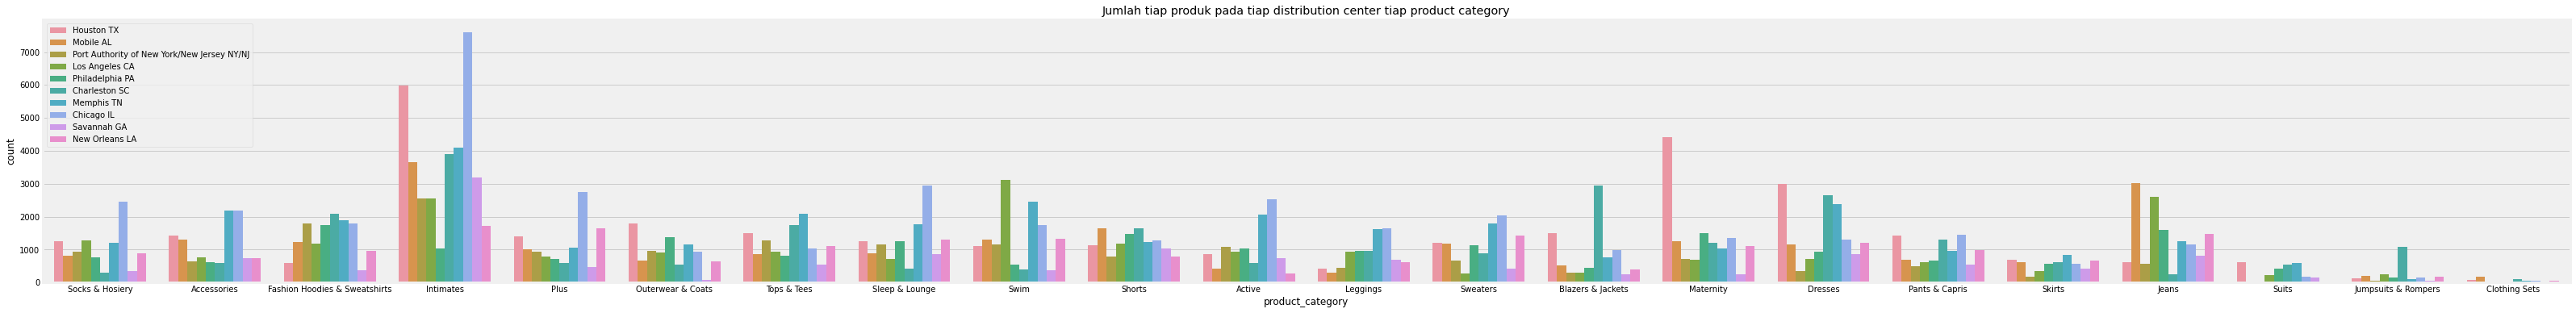

#**MODEL DEVELOPMENT**

Import library sklearn

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

##**MEN**

eliminasi kolom product_department

In [ ]:
dfprodm.drop(columns=['product_department'],inplace=True)

In [ ]:
dfprodm

,cost,product_category,product_retail_price,name
0,13.925,Tops & Tees,25.0,Houston TX
1,13.925,Tops & Tees,25.0,Houston TX
2,13.925,Tops & Tees,25.0,Houston TX
3,13.925,Tops & Tees,25.0,Houston TX
4,13.925,Tops & Tees,25.0,Houston TX
...,...,...,...,...
244416,14.751,Active,33.0,Houston TX
244417,14.751,Active,33.0,Houston TX
244418,14.751,Active,33.0,Houston TX
244419,14.751,Active,33.0,Houston TX


one hot encoding untuk data object serta standard scaler untuk data keseluruhan

In [ ]:
encoder = OneHotEncoder()
encoder.fit(dfprodm.select_dtypes(include="object"))
dfprodm_onehot = pd.DataFrame(encoder.transform(dfprodm.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

dfprodm_preprocessed = pd.concat([dfprodm.select_dtypes(exclude="object"), dfprodm_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(dfprodm_preprocessed)
dfprodm_scaled = pd.DataFrame(scaler.transform(dfprodm_preprocessed),columns=dfprodm_preprocessed.columns)

dfprodm_scaled.head()

,cost,product_retail_price,product_category_Accessories,product_category_Active,product_category_Fashion Hoodies & Sweatshirts,product_category_Jeans,product_category_Outerwear & Coats,product_category_Pants,product_category_Shorts,product_category_Sleep & Lounge,...,name_Charleston SC,name_Chicago IL,name_Houston TX,name_Los Angeles CA,name_Memphis TN,name_Mobile AL,name_New Orleans LA,name_Philadelphia PA,name_Port Authority of New York/New Jersey NY/NJ,name_Savannah GA
0,-0.698735,-0.785239,-0.256959,-0.247276,-0.284482,-0.305911,-0.25742,-0.291414,-0.278395,-0.27761,...,-0.287496,-0.344897,2.72736,-0.341725,-0.391437,-0.348666,-0.258746,-0.338911,-0.352821,-0.287904
1,-0.698735,-0.785239,-0.256959,-0.247276,-0.284482,-0.305911,-0.25742,-0.291414,-0.278395,-0.27761,...,-0.287496,-0.344897,2.72736,-0.341725,-0.391437,-0.348666,-0.258746,-0.338911,-0.352821,-0.287904
2,-0.698735,-0.785239,-0.256959,-0.247276,-0.284482,-0.305911,-0.25742,-0.291414,-0.278395,-0.27761,...,-0.287496,-0.344897,2.72736,-0.341725,-0.391437,-0.348666,-0.258746,-0.338911,-0.352821,-0.287904
3,-0.698735,-0.785239,-0.256959,-0.247276,-0.284482,-0.305911,-0.25742,-0.291414,-0.278395,-0.27761,...,-0.287496,-0.344897,2.72736,-0.341725,-0.391437,-0.348666,-0.258746,-0.338911,-0.352821,-0.287904
4,-0.698735,-0.785239,-0.256959,-0.247276,-0.284482,-0.305911,-0.25742,-0.291414,-0.278395,-0.27761,...,-0.287496,-0.344897,2.72736,-0.341725,-0.391437,-0.348666,-0.258746,-0.338911,-0.352821,-0.287904


clustering mini batch kmeans dengan k=10

In [ ]:
k=10
km_10= MiniBatchKMeans(n_clusters=k)

km_10.fit(dfprodm_scaled)

Done fitting kMeans in 1.458s


clustering mini batch kmeans dengan k=20

In [ ]:
k=20
km_20= MiniBatchKMeans(n_clusters=k)
km_20.fit(dfprodm_scaled)

MiniBatchKMeans(n_clusters=20)

In [ ]:
dfprodm=dfprodm.assign(
    clusters_of_10=km_10.predict(dfprodm_scaled),
    clusters_of_20=km_20.predict(dfprodm_scaled),
)

dfprodm

,cost,product_category,product_retail_price,name,clusters_of_10,clusters_of_20
0,13.925,Tops & Tees,25.0,Houston TX,3,7
1,13.925,Tops & Tees,25.0,Houston TX,3,7
2,13.925,Tops & Tees,25.0,Houston TX,3,7
3,13.925,Tops & Tees,25.0,Houston TX,3,7
4,13.925,Tops & Tees,25.0,Houston TX,3,7
...,...,...,...,...,...,...
244416,14.751,Active,33.0,Houston TX,3,12
244417,14.751,Active,33.0,Houston TX,3,12
244418,14.751,Active,33.0,Houston TX,3,12
244419,14.751,Active,33.0,Houston TX,3,12


Kardinalitas tiap cluster

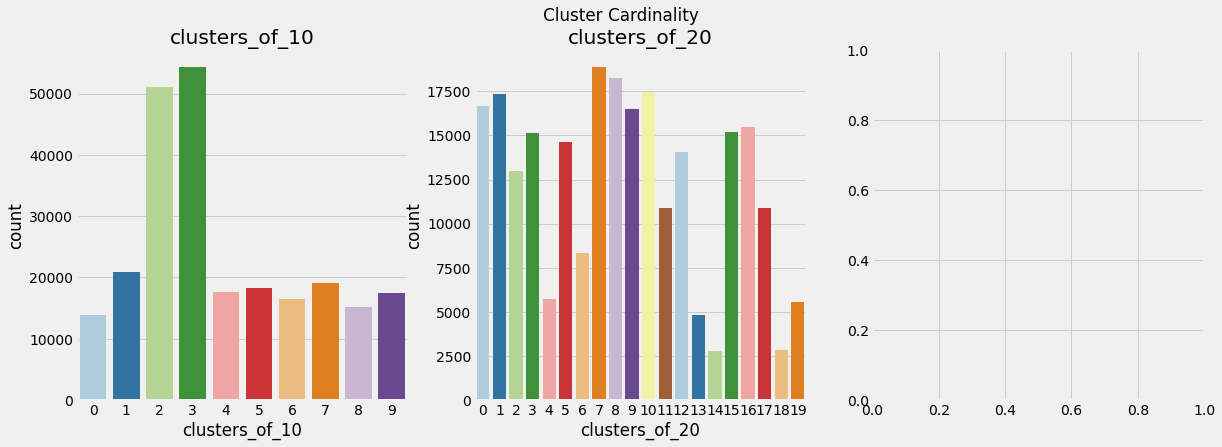

In [ ]:
fig,axis = plt.subplots(1,3,figsize=(18, 6))
for ax,preds in zip(axis, ["clusters_of_10", "clusters_of_20"]):
    sns.countplot(x=preds, data=dfprodm, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

1. Pada k=10, nampak kardinalitas cluster 2 dan 3 jauh lebih tinggi dari cluster lain
2. Pada k=20, nampak cluster 4,13,14, dan 18 memiliki kardinalitas jauh lebih rendah daripada cluster lain

Magnitude cluster

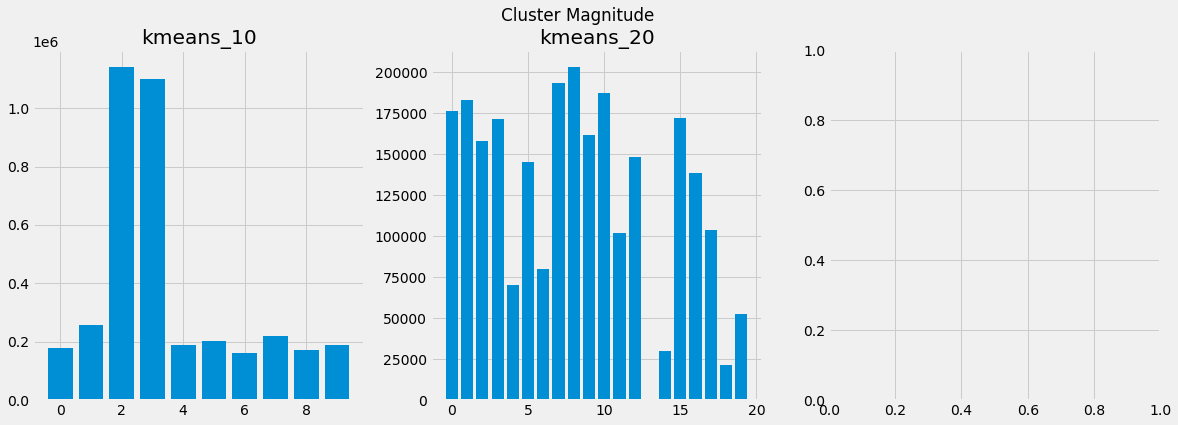

In [ ]:
fig,axis = plt.subplots(1, 3, figsize=(18, 6))
for ax,model,name in zip(axis,[km_10, km_20],["kmeans_10","kmeans_20"]):
    distances=model.transform(dfprodm_scaled)
    preds=model.predict(dfprodm_scaled)
    inertia_per_cluster=np.array([sum(dist[c]**2 for dist,c in zip(distances,preds) if c==cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters),height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

1. Pada k=10, nampak magnitude cluster 2 dan 3 jauh lebih tinggi dari cluster lain
2. Pada k=20, nampak cluster 4,6,13,14, dan 18 memiliki magnitude jauh lebih rendah daripada cluster lain

Pemilihan jumlah cluster dengan elbow method

In [ ]:
ssd = []

for k in range(10, 21):
    model=KMeans(n_clusters=k, random_state=19)
    model.fit(dfprodm_scaled)

    ssd.append(model.inertia_)

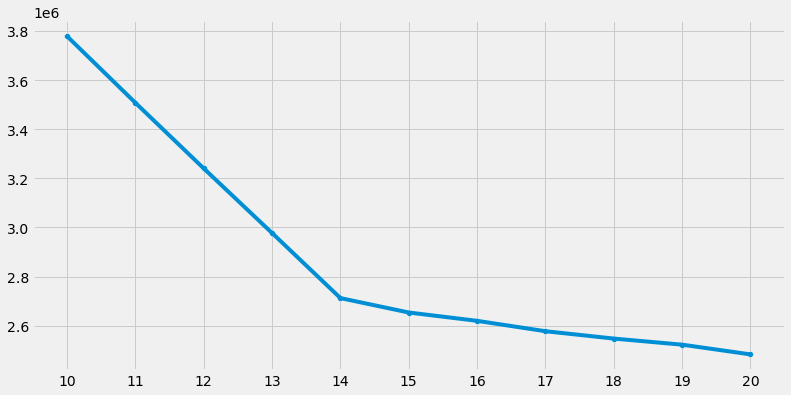

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(10, 21), y=ssd)
sns.scatterplot(x=range(10, 21), y=ssd)
plt.xticks(range(10, 21))
plt.show()

Nampak bahwa jumlah cluster ideal berdasar elbow method adalah 16

Pemilihan jumlah cluster dengan silhouette score

In [ ]:
silhouette_scores = []

for k in range(11, 21):
    model = KMeans(n_clusters=k, random_state=11)
    model.fit(dfprodm_scaled)

    silhouette_scores.append(silhouette_score(dfprodm_scaled, model.labels_))

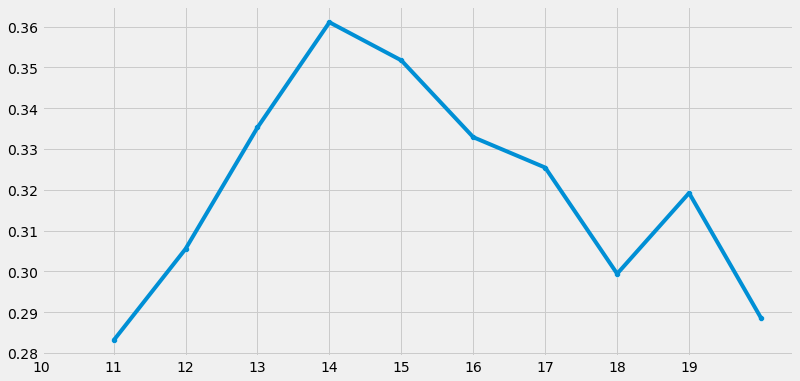

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(11, 21), y=silhouette_scores)
sns.scatterplot(x=range(11, 21), y=silhouette_scores)
plt.xticks(range(10, 20))
plt.show()

Nampak bahwa jumlah cluster ideal berdasar silhouette score adalah 14

Mengambil jumlah cluster ideal=14

In [ ]:
k=14
km_14= MiniBatchKMeans(n_clusters=k)
km_14.fit(dfprodm_scaled)

MiniBatchKMeans(n_clusters=14)

In [ ]:
dfprodm=dfprodm.assign(
    clusters_of_14=km_14.predict(dfprodm_scaled),
)
del dfprodm['clusters_of_10']
del dfprodm['clusters_of_20']
dfprodm

,cost,product_category,product_retail_price,name,clusters_of_14
0,13.925,Tops & Tees,25.0,Houston TX,6
1,13.925,Tops & Tees,25.0,Houston TX,6
2,13.925,Tops & Tees,25.0,Houston TX,6
3,13.925,Tops & Tees,25.0,Houston TX,6
4,13.925,Tops & Tees,25.0,Houston TX,6
...,...,...,...,...,...
244416,14.751,Active,33.0,Houston TX,9
244417,14.751,Active,33.0,Houston TX,9
244418,14.751,Active,33.0,Houston TX,9
244419,14.751,Active,33.0,Houston TX,9


Exporting table

In [ ]:
dfprodm.to_csv('/content/drive/MyDrive/FINAL PROJECT RG 210/dept_product/inv_distribution_center_men_clustered.csv')

##**WOMEN**

eliminasi kolom product_department

In [ ]:
dfprodw.drop(columns=['product_department'],inplace=True)

one hot encoding untuk data object serta standard scaler untuk data keseluruhan

In [ ]:
encoder.fit(dfprodw.select_dtypes(include="object"))
dfprodw_onehot = pd.DataFrame(encoder.transform(dfprodw.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

dfprodw_preprocessed = pd.concat([dfprodw.select_dtypes(exclude="object"), dfprodw_onehot],axis=1)

scaler.fit(dfprodw_preprocessed)
dfprodw_scaled = pd.DataFrame(scaler.transform(dfprodw_preprocessed),columns=dfprodw_preprocessed.columns)

dfprodw_scaled.head()

,cost,product_retail_price,product_category_Accessories,product_category_Active,product_category_Blazers & Jackets,product_category_Clothing Sets,product_category_Dresses,product_category_Fashion Hoodies & Sweatshirts,product_category_Intimates,product_category_Jeans,...,name_Charleston SC,name_Chicago IL,name_Houston TX,name_Los Angeles CA,name_Memphis TN,name_Mobile AL,name_New Orleans LA,name_Philadelphia PA,name_Port Authority of New York/New Jersey NY/NJ,name_Savannah GA
0,-0.992125,-0.878185,-0.220349,-0.212873,-0.189351,-0.05021,-0.252568,-0.243746,-0.419223,-0.241626,...,-0.341796,-0.431919,2.544907,-0.311079,-0.393855,-0.323199,-0.295585,-0.29777,-0.275839,-0.240823
1,-0.992125,-0.878185,-0.220349,-0.212873,-0.189351,-0.05021,-0.252568,-0.243746,-0.419223,-0.241626,...,-0.341796,-0.431919,2.544907,-0.311079,-0.393855,-0.323199,-0.295585,-0.29777,-0.275839,-0.240823
2,-0.992125,-0.878185,-0.220349,-0.212873,-0.189351,-0.05021,-0.252568,-0.243746,-0.419223,-0.241626,...,-0.341796,-0.431919,2.544907,-0.311079,-0.393855,-0.323199,-0.295585,-0.29777,-0.275839,-0.240823
3,-0.992125,-0.878185,-0.220349,-0.212873,-0.189351,-0.05021,-0.252568,-0.243746,-0.419223,-0.241626,...,-0.341796,-0.431919,2.544907,-0.311079,-0.393855,-0.323199,-0.295585,-0.29777,-0.275839,-0.240823
4,-0.992125,-0.878185,-0.220349,-0.212873,-0.189351,-0.05021,-0.252568,-0.243746,-0.419223,-0.241626,...,-0.341796,-0.431919,2.544907,-0.311079,-0.393855,-0.323199,-0.295585,-0.29777,-0.275839,-0.240823


clustering mini batch kmeans dengan k=10

In [ ]:
k=10
km_10_w= MiniBatchKMeans(n_clusters=k)

km_10_w.fit(dfprodw_scaled)

MiniBatchKMeans(n_clusters=10)

clustering mini batch kmeans dengan k=20

In [ ]:
k=20
km_20_w= MiniBatchKMeans(n_clusters=k)
km_20_w.fit(dfprodw_scaled)

MiniBatchKMeans(n_clusters=20)

In [ ]:
dfprodw=dfprodw.assign(
    clusters_of_10_w=km_10_w.predict(dfprodw_scaled),
    clusters_of_20_w=km_20_w.predict(dfprodw_scaled),
)

dfprodw

,cost,product_category,product_retail_price,name,clusters_of_10_w,clusters_of_20_w
0,5.712000,Socks & Hosiery,16.000000,Houston TX,0,9
1,5.712000,Socks & Hosiery,16.000000,Houston TX,0,9
2,5.712000,Socks & Hosiery,16.000000,Houston TX,0,9
3,5.712000,Socks & Hosiery,16.000000,Houston TX,0,9
4,5.712000,Socks & Hosiery,16.000000,Houston TX,0,9
...,...,...,...,...,...,...
242968,15.752521,Maternity,35.720001,Charleston SC,3,16
242969,15.752521,Maternity,35.720001,Charleston SC,3,16
242970,15.752521,Maternity,35.720001,Charleston SC,3,16
242971,15.752521,Maternity,35.720001,Charleston SC,3,16


Kardinalitas tiap cluster

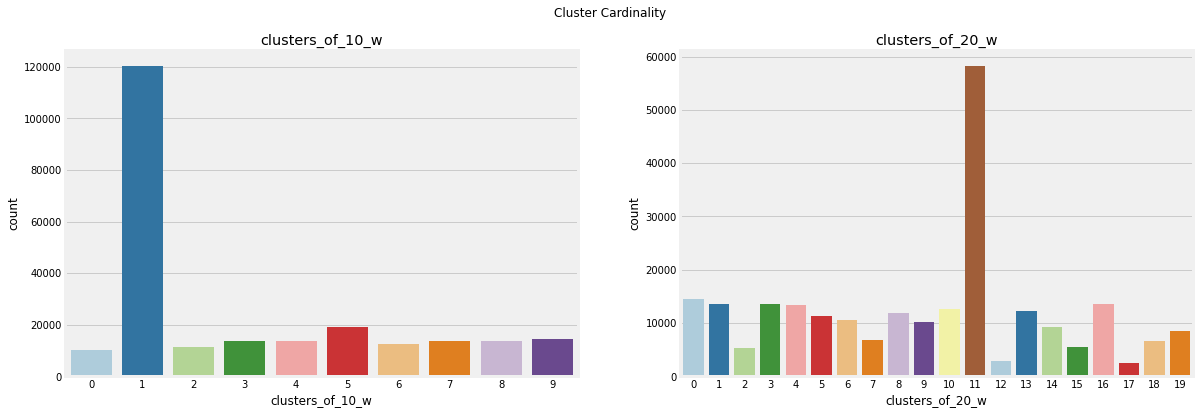

In [ ]:
fig,axis = plt.subplots(1,2,figsize=(18, 6))
for ax,preds in zip(axis, ["clusters_of_10_w", "clusters_of_20_w"]):
    sns.countplot(x=preds, data=dfprodw, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

1. Pada k=10, nampak kardinalitas cluster 2 jauh lebih tinggi dari cluster lain
2. Pada k=20, nampak cluster 9 memiliki kardinalitas jauh lebih tinggi daripada cluster lain

Magnitude tiap cluster

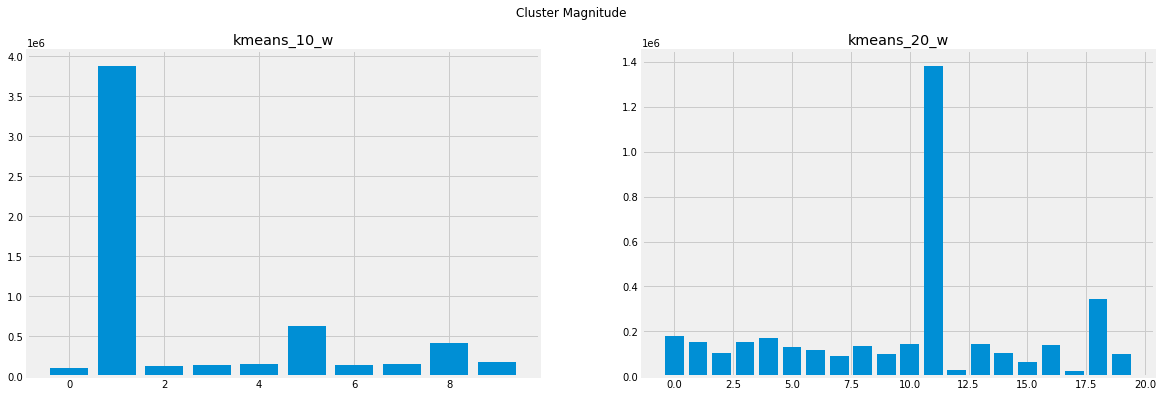

In [ ]:
fig,axis = plt.subplots(1, 2, figsize=(18, 6))
for ax,model,name in zip(axis,[km_10_w, km_20_w],["kmeans_10_w","kmeans_20_w"]):
    distances=model.transform(dfprodw_scaled)
    preds=model.predict(dfprodw_scaled)
    inertia_per_cluster=np.array([sum(dist[c]**2 for dist,c in zip(distances,preds) if c==cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters),height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

1. Pada k=10, nampak magnitude cluster 2 dan 4 jauh lebih tinggi dari cluster lain
2. Pada k=20, nampak cluster 4,10,11 memiliki magnitude jauh lebih tinggi daripada cluster lain

Pemilihan jumlah cluster terbaik menggunakan elbow method

In [ ]:
ssd = []

for k in range(10, 21):
    model=KMeans(n_clusters=k, random_state=19)
    model.fit(dfprodw_scaled)

    ssd.append(model.inertia_)

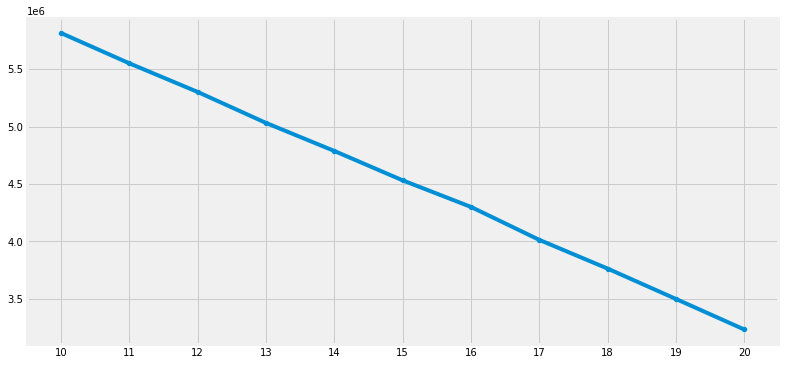

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(10, 21), y=ssd)
sns.scatterplot(x=range(10, 21), y=ssd)
plt.xticks(range(10, 21))
plt.show()

Nampak bahwa jumlah cluster ideal berdasar elbow method adalah 20

Pemilihan jumlah cluster terbaik menggunakan silhouette score

In [ ]:
silhouette_scores = []

for k in range(11, 21):
    model = KMeans(n_clusters=k, random_state=11)
    model.fit(dfprodw_scaled)

    silhouette_scores.append(silhouette_score(dfprodw_scaled, model.labels_))

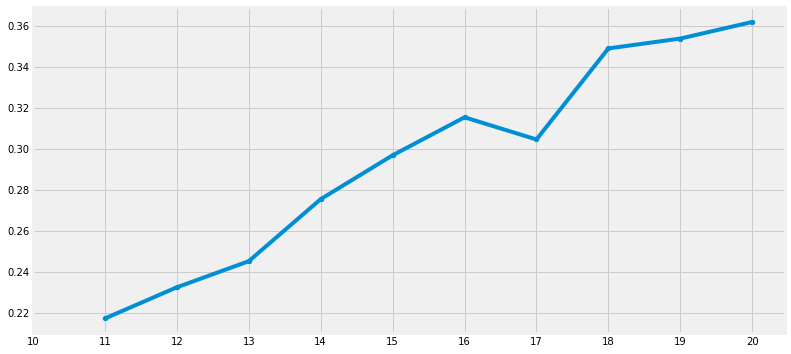

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(11, 21), y=silhouette_scores)
sns.scatterplot(x=range(11, 21), y=silhouette_scores)
plt.xticks(range(10, 21))
plt.show()

Nampak bahwa jumlah cluster ideal berdasar silhouette score adalah 20

In [ ]:
del dfprodw['clusters_of_10_w']

In [ ]:
dfprodw

,cost,product_category,product_retail_price,name,clusters_of_20_w
0,5.712000,Socks & Hosiery,16.000000,Houston TX,9
1,5.712000,Socks & Hosiery,16.000000,Houston TX,9
2,5.712000,Socks & Hosiery,16.000000,Houston TX,9
3,5.712000,Socks & Hosiery,16.000000,Houston TX,9
4,5.712000,Socks & Hosiery,16.000000,Houston TX,9
...,...,...,...,...,...
242968,15.752521,Maternity,35.720001,Charleston SC,16
242969,15.752521,Maternity,35.720001,Charleston SC,16
242970,15.752521,Maternity,35.720001,Charleston SC,16
242971,15.752521,Maternity,35.720001,Charleston SC,16


exporting files

In [ ]:
dfprodw.to_csv('/content/drive/MyDrive/FINAL PROJECT RG 210/dept_product/inv_distribution_center_women_clustered.csv')